Assignment-1:Generating two series of multiples of 2 and 3 respectively and combining them to form a single data matrix .The target matrix predicts the product of elements of a particular row of the data matrix.


In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
X1 = [((x+1)*2)/100 for x in range(100)]
X2 = [((x+1)*3)/100for x in range(100)]
Data = np.column_stack((X1, X2))
target = [x1*x2 for x1,x2 in zip(X1,X2)]


In [0]:
Data

array([[0.02, 0.03],
       [0.04, 0.06],
       [0.06, 0.09],
       [0.08, 0.12],
       [0.1 , 0.15],
       [0.12, 0.18],
       [0.14, 0.21],
       [0.16, 0.24],
       [0.18, 0.27],
       [0.2 , 0.3 ],
       [0.22, 0.33],
       [0.24, 0.36],
       [0.26, 0.39],
       [0.28, 0.42],
       [0.3 , 0.45],
       [0.32, 0.48],
       [0.34, 0.51],
       [0.36, 0.54],
       [0.38, 0.57],
       [0.4 , 0.6 ],
       [0.42, 0.63],
       [0.44, 0.66],
       [0.46, 0.69],
       [0.48, 0.72],
       [0.5 , 0.75],
       [0.52, 0.78],
       [0.54, 0.81],
       [0.56, 0.84],
       [0.58, 0.87],
       [0.6 , 0.9 ],
       [0.62, 0.93],
       [0.64, 0.96],
       [0.66, 0.99],
       [0.68, 1.02],
       [0.7 , 1.05],
       [0.72, 1.08],
       [0.74, 1.11],
       [0.76, 1.14],
       [0.78, 1.17],
       [0.8 , 1.2 ],
       [0.82, 1.23],
       [0.84, 1.26],
       [0.86, 1.29],
       [0.88, 1.32],
       [0.9 , 1.35],
       [0.92, 1.38],
       [0.94, 1.41],
       [0.96,

In [0]:
target

[0.0006,
 0.0024,
 0.005399999999999999,
 0.0096,
 0.015,
 0.021599999999999998,
 0.029400000000000003,
 0.0384,
 0.048600000000000004,
 0.06,
 0.0726,
 0.08639999999999999,
 0.1014,
 0.11760000000000001,
 0.135,
 0.1536,
 0.17340000000000003,
 0.19440000000000002,
 0.2166,
 0.24,
 0.2646,
 0.2904,
 0.3174,
 0.34559999999999996,
 0.375,
 0.4056,
 0.43740000000000007,
 0.47040000000000004,
 0.5045999999999999,
 0.54,
 0.5766,
 0.6144,
 0.6534,
 0.6936000000000001,
 0.735,
 0.7776000000000001,
 0.8214,
 0.8664,
 0.9126,
 0.96,
 1.0086,
 1.0584,
 1.1094,
 1.1616,
 1.215,
 1.2696,
 1.3254,
 1.3823999999999999,
 1.4405999999999999,
 1.5,
 1.5606,
 1.6224,
 1.6854000000000002,
 1.7496000000000003,
 1.815,
 1.8816000000000002,
 1.9493999999999998,
 2.0183999999999997,
 2.0886,
 2.16,
 2.2326,
 2.3064,
 2.3813999999999997,
 2.4576,
 2.535,
 2.6136,
 2.6934,
 2.7744000000000004,
 2.8565999999999994,
 2.94,
 3.0245999999999995,
 3.1104000000000003,
 3.1974,
 3.2856,
 3.375,
 3.4656,
 3.557400000

In [0]:
data = np.array(Data,dtype=float)
target = np.array(target,dtype=float)

In [0]:
data = np.array(data).reshape(100, 2,1)
data.shape

(100, 2, 1)

In [0]:
target.shape

(100,)

In [0]:
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.2,random_state=4)

In [0]:
model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(2,1)))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(25, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
print(model.summary())





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 2, 200)            161600    
_________________________________________________________________
lstm_2 (LSTM)                (None, 2, 100)            120400    
_________________________________________________________________
lstm_3 (LSTM)                (None, 2, 50)             30200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 25)                7600      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                520       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)            

In [0]:
history = model.fit(x_train,y_train,epochs=2000,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 80 samples, validate on 20 samples
Epoch 1/2000





80/80 [==============================] - 4s 45ms/step - loss: 7.7760 - val_loss: 5.6791
Epoch 2/2000
80/80 [==============================] - 0s 1ms/step - loss: 7.7036 - val_loss: 5.6239
Epoch 3/2000
80/80 [==============================] - 0s 917us/step - loss: 7.6251 - val_loss: 5.5647
Epoch 4/2000
80/80 [==============================] - 0s 913us/step - loss: 7.5404 - val_loss: 5.5001
Epoch 5/2000
80/80 [==============================] - 0s 911us/step - loss: 7.4422 - val_loss: 5.4297
Epoch 6/2000
80/80 [==============================] - 0s 904us/step - loss: 7.3414 - val_loss: 5.3504
Epoch 7/2000
80/80 [==============================] - 0s 1ms/step - loss: 7.2211 - val_loss: 5.2585
Epoch 8/2000
80/80 [==============================] - 0s 986us/step - loss: 7.0816 - val_loss: 5.1502
Epoch 9/2000
80/80 [=======================

In [0]:
results = model.predict(x_test)

In [0]:
results.shape

(20, 1)

In [0]:
y_test.shape

(20,)

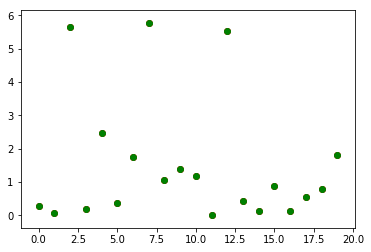

In [0]:
plt.scatter(range(20),results,c='r')
plt.scatter(range(20),y_test,c='g')
plt.show()

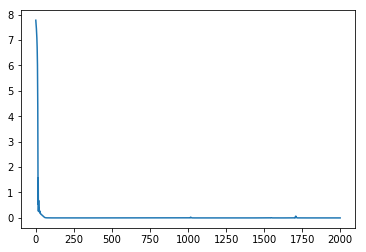

In [0]:
plt.plot(history.history['loss'])
plt.show()